In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Hyper Parameters
num_epochs = 0
batch_size = 4
learning_rate = 0.001


In [4]:
# dataset has PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(
    root='.', train=True, download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(
    root='.', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [5]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [6]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

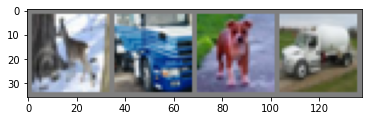

In [7]:
# show images
imshow(torchvision.utils.make_grid(images))

In [8]:
conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)
print(images.shape)

torch.Size([4, 3, 32, 32])


In [9]:
x = conv1(images)
print(x.shape)

torch.Size([4, 6, 28, 28])


In [10]:
x = pool(x)
print(x.shape)

torch.Size([4, 6, 14, 14])


In [11]:
x = conv2(x)
print(x.shape)

torch.Size([4, 16, 10, 10])


In [12]:
x = pool(x)
print(x.shape)

torch.Size([4, 16, 5, 5])
